In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()

In [3]:
X = iris.data
target = iris.target
target_names = iris.target_names

In [4]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#!pip install tensorflow

In [6]:
import tensorflow as tf

tf.__version__

'2.8.0'

In [7]:
X = df.drop('species', axis=1)
Y = df['species'] 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(x_train)

StandardScaler()

In [11]:
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [12]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

In [13]:
n_features = x_train_std.shape[1]
n_features

4

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(6, activation='relu', input_shape=(n_features,)),
     tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [30]:
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 30        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [34]:
hist = model.fit(x_train_std, y_train, epochs=300, validation_data=(x_test_std, y_test), verbose=0)

In [43]:
loss, acc = model.evaluate(x_train_std, y_train, verbose=0)
print('Train loss:', loss)
print('Train acc:', acc)

Train loss: 0.0
Train acc: 0.7047619223594666


In [44]:
loss, acc = model.evaluate(x_test_std, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Test loss: 0.0
Test acc: 0.5777778029441833


In [37]:
losses = pd.DataFrame(hist.history)

In [38]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.0,0.704762,0.0,0.577778
1,0.0,0.704762,0.0,0.577778
2,0.0,0.704762,0.0,0.577778
3,0.0,0.704762,0.0,0.577778
4,0.0,0.704762,0.0,0.577778
...,...,...,...,...
295,0.0,0.704762,0.0,0.577778
296,0.0,0.704762,0.0,0.577778
297,0.0,0.704762,0.0,0.577778
298,0.0,0.704762,0.0,0.577778


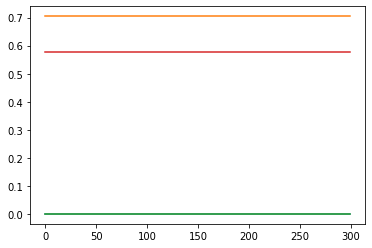

In [39]:
plt.plot(losses)

In [16]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist = model.fit(x_train_std, y_train, epochs=300, validation_data=(x_test_std, y_test), verbose=0)

In [18]:
loss, acc = model.evaluate(x_train_std, y_train, verbose=0)
print('Train loss:', loss)
print('Train acc:', acc)

Train loss: 0.0638367086648941
Train acc: 0.9809523820877075


In [19]:
loss, acc = model.evaluate(x_test_std, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Test loss: 0.077264204621315
Test acc: 0.9777777791023254


In [20]:
losses = pd.DataFrame(hist.history)

In [21]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.078544,0.485714,1.166280,0.400000
1,1.059772,0.495238,1.147670,0.400000
2,1.041352,0.504762,1.130311,0.422222
3,1.024880,0.495238,1.113930,0.422222
4,1.008289,0.504762,1.098331,0.444444
...,...,...,...,...
295,0.063975,0.971429,0.078356,0.977778
296,0.063456,0.971429,0.077841,0.977778
297,0.065135,0.971429,0.077496,0.977778
298,0.063776,0.980952,0.077441,0.977778


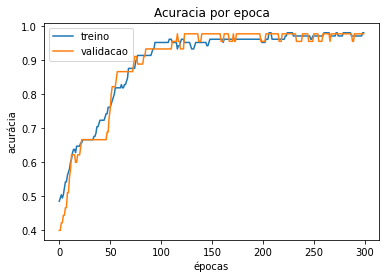

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acuracia por epoca')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validacao'])
plt.show()

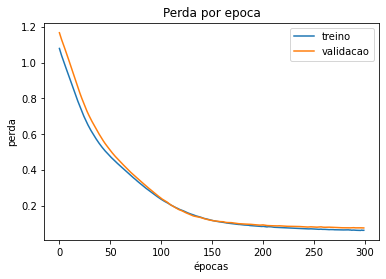

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perda por epoca')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])
plt.show()

In [25]:
from tensorflow.keras.models import load_model

In [24]:
model.save('best_model.h5')

In [26]:
my_model = load_model('best_model.h5')

In [27]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
